In [3]:
# !pip install ipympl

In [1]:
import json,glob,sys,os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, Select
import numpy as np

In [19]:
# %matplotlib widget

In [2]:
%matplotlib inline

In [3]:
att_file = open('attention_layers.json') # Check layer1, head1 and layer4,head1 for this model's attention heads
att_file_read = att_file.read() 
att_data = json.loads(att_file_read)

In [41]:
# data = px.imshow(att_data['75']["att_heads"]['layer_1']['head_1'][0])
# data.show()

In [4]:
att_data.keys()

dict_keys(['75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'source', 'prediction', 'target'])

In [5]:
token_min = 75
token_max = 99
layer_min = 1
layer_max = 6

tokens = np.arange(0, 100).reshape(4,5,5)

In [6]:
print(tokens) #Not sure how to plot just the values to get an idea of the tokens

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]]

 [[25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]
  [45 46 47 48 49]]

 [[50 51 52 53 54]
  [55 56 57 58 59]
  [60 61 62 63 64]
  [65 66 67 68 69]
  [70 71 72 73 74]]

 [[75 76 77 78 79]
  [80 81 82 83 84]
  [85 86 87 88 89]
  [90 91 92 93 94]
  [95 96 97 98 99]]]


In [7]:

def plot_pred():
    nrows = 5 # No of tokens
    ncols = 5 # No of tokens

    x_index,y_index = (0,0)
    fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
    pred_array = np.array(list(att_data["prediction"].values()))
    for i in range(token_min,token_max+1):
        i_mod = i - token_min
        if y_index < ncols:
            ax[x_index,y_index].imshow(att_data["prediction"][str(i)],cmap="Reds",
                                       vmin=pred_array.min(),vmax=pred_array.max())
            ax[x_index,y_index].set_title("{}".format(i),fontsize=8)
            y_index +=1
            if y_index >= ncols:
                y_index = 0
                x_index+=1
    #     if i > (token_min+nrows):


In [8]:
src = np.array(att_data["source"])

In [9]:
src.shape

(4, 40, 40)

In [13]:
tokenW = Dropdown(options = att_data.keys())

# tokenW1 = widgets.Play(value=token_min,min=token_min,max=token_max,step=1)


layer_options = att_data[tokenW.options[0]]["att_heads"].keys()
layerW = Dropdown(options = layer_options)

head_options = att_data[tokenW.options[0]]["att_heads"][layerW.options[0]].keys()
headW = Dropdown(options=head_options)

play = widgets.Play(
#     interval=10,
    value=token_min,
    min=token_min,
    max=token_max,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(min=token_min,max=token_max)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])
widgets.HBox([play])

opacity = widgets.FloatSlider(min=0,max=1,value=0.5)
layer_slider = widgets.IntSlider(min=layer_min,max=layer_max)


# fig = px.imshow(np.array(att_data['75']["att_heads"]['layer_0']['head_0']), facet_col=0, facet_col_wrap=1)

@interact(token_ID = slider,layer_slider=layer_slider,head = headW,opacity=opacity)
def plot_head(token_ID,layer_slider,head,opacity):
#     print(token_ID)
    layer_no = layer_slider
    fig,ax = plt.subplots(1, 4, figsize=(15,4))
    fig.suptitle("Attention heads", fontsize=14)
    for i in range(4):
        imgA = np.array(att_data[str(token_ID)]["att_heads"]['layer_'+str(layer_no)][head][i])
        imgB = np.array(att_data["source"][i])
        att_lyr = ax[i].imshow(imgA,vmin = 0,vmax=1)
        src_lyr = ax[i].imshow(imgB,alpha=opacity,extent=att_lyr.get_extent(),cmap="Reds")
    
    
    # Comment this section if you dont want to visualise average of attention heads
#     avg_arr= att_data[str(token_ID)]["avg_arr"]
#     fig1,ax1 = plt.subplots(1, 4, figsize=(15,4))
#     fig1.suptitle("Average of Attention heads", fontsize=14)
#     for i in range(4):
#         imgA = np.array(avg_arr[layer_no-1][i])
#         imgB = np.array(att_data["source"][i])
#         att_lyr = ax1[i].imshow(imgA,vmin = np.min(avg_arr),vmax=np.max(avg_arr))
#         src_lyr = ax1[i].imshow(imgB,alpha=opacity,extent=att_lyr.get_extent(),cmap="Reds")    
    plt.show()



interactive(children=(IntSlider(value=75, description='token_ID', max=99, min=75), IntSlider(value=1, descript…

In [11]:
tokenW = Dropdown(options = att_data.keys())

# tokenW1 = widgets.Play(value=token_min,min=token_min,max=token_max,step=1)
slider = widgets.IntSlider(min=token_min,max=token_max)
# widgets.jslink((play, 'value'), (slider, 'value'))
# widgets.HBox([play, slider])
# widgets.HBox([play])

# layer_options = att_data[tokenW.options[0]]["att_heads"].keys()
layerW = widgets.IntSlider(min=layer_min,max=layer_max)

# fig = px.imshow(np.array(att_data['75']["att_heads"]['layer_0']['head_0']), facet_col=0, facet_col_wrap=1)

@interact(token_ID = slider,layer=layerW)
def plot_head(token_ID,layer):
#     print(token_ID)
    avg_arr= att_data[str(token_ID)]["avg_arr"]
    fig,ax = plt.subplots(1, 4, figsize=(15,4))
    fig.suptitle("Average of Attention heads", fontsize=14)

    for i in range(4):
        imgA = np.array(avg_arr[layer-1][i])
        imgB = np.array(att_data["source"][i])
        att_lyr = ax[i].imshow(imgA,vmin = np.min(avg_arr),vmax=np.max(avg_arr))
        src_lyr = ax[i].imshow(imgB,alpha=0.5,extent=att_lyr.get_extent(),cmap="Reds")
    
    plt.show()
#     print(token_ID)

interactive(children=(IntSlider(value=75, description='token_ID', max=99, min=75), IntSlider(value=1, descript…

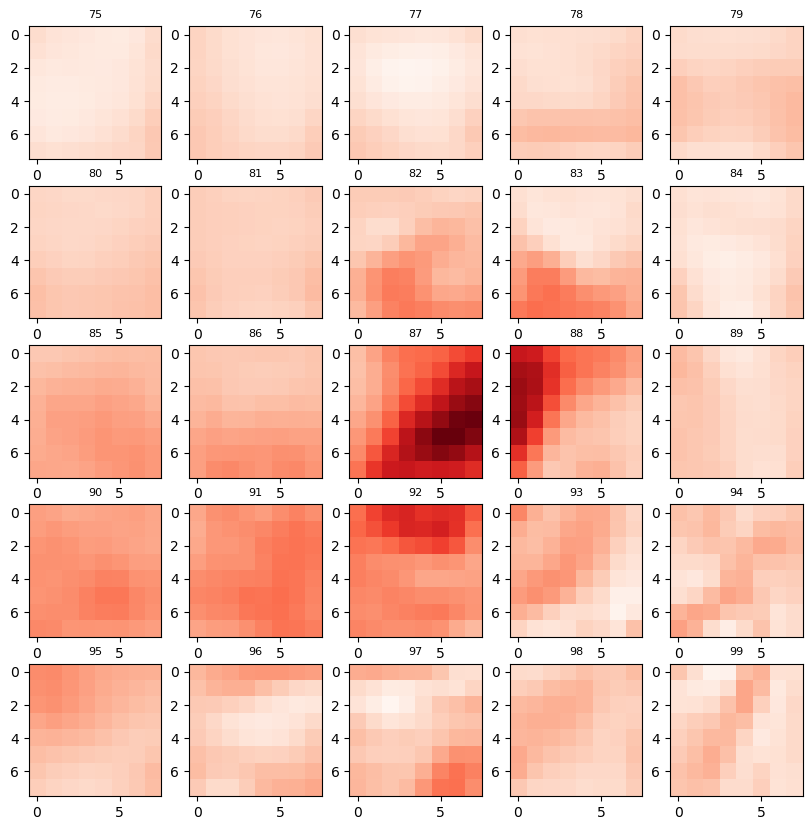

In [65]:
nrows = 5 # No of tokens
ncols = 5 # No of tokens

x_index,y_index = (0,0)
fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
pred_array = np.array(list(att_data["prediction"].values()))
for i in range(token_min,token_max+1):
    i_mod = i - token_min
    if y_index < ncols:
        ax[x_index,y_index].imshow(att_data["prediction"][str(i)],cmap="Reds",
                                   vmin=pred_array.min(),vmax=pred_array.max())
        ax[x_index,y_index].set_title("{}".format(i),fontsize=8)
        y_index +=1
        if y_index >= ncols:
            y_index = 0
            x_index+=1
#     if i > (token_min+nrows):
